In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
dataFrame = pd.read_excel("sample_data/merc.xlsx")

In [ ]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame.isnull().sum()

,0
year,0
price,0
transmission,0
mileage,0
tax,0
mpg,0
engineSize,0


/tmp/ipython-input-1705276731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"])


<Axes: xlabel='price', ylabel='Density'>

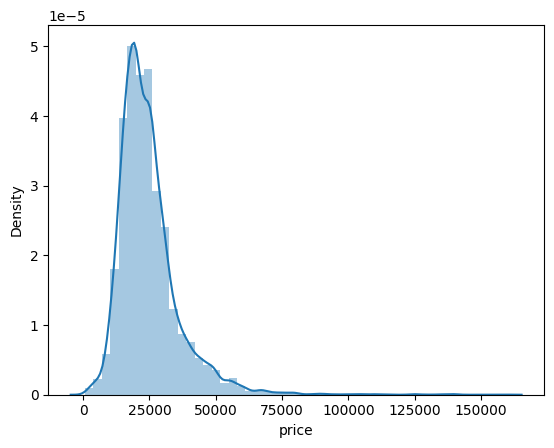

In [ ]:
sbn.distplot(dataFrame["price"])

grafiğin sağındaki kısımlar modeli bozuyor
Belirli bir kısmını silebiliriz

In [ ]:
# Drop the non-numeric 'transmission' column before calculating correlation
dataFrame_numeric = dataFrame.drop('transmission', axis=1)
dataFrame_numeric.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
dataFrame_numeric.corr()["price"].sort_values()

,price
mileage,-0.537214
mpg,-0.438445
tax,0.268717
engineSize,0.516126
year,0.520712
price,1.000000


<Axes: xlabel='mileage', ylabel='price'>

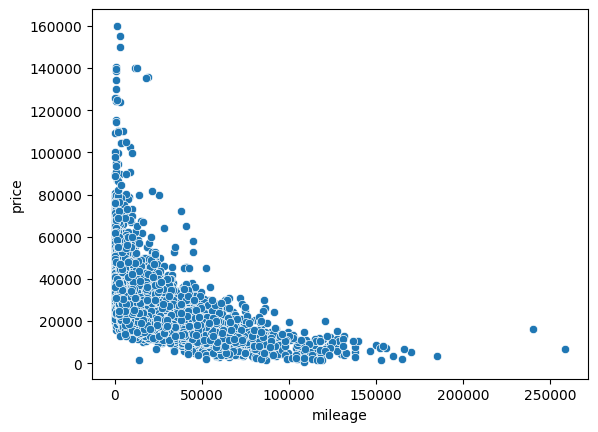

In [ ]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame_numeric)

In [ ]:
dataFrame_numeric.sort_values("price", ascending = False).head(20)

,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


Bu tablodan da anlaşılacağı gibi çok yüksek ve istisna olan değerler var

In [ ]:
len(dataFrame)
# Bir veri setinin yüzde 1 ini çıkarırsak veri setini büyük ihtimalle bozmayız
# o yüzden verinin en yüksek fiyatlı olan %1 ini silersek olur
len(dataFrame)*0.01

131.19

en yüksek fiyatlı 131 arabayı silelim

In [ ]:
cleaned_df = dataFrame_numeric.sort_values("price", ascending = False).iloc[131:]
cleaned_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


/tmp/ipython-input-2234517500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(cleaned_df["price"])


<Axes: xlabel='price', ylabel='Density'>

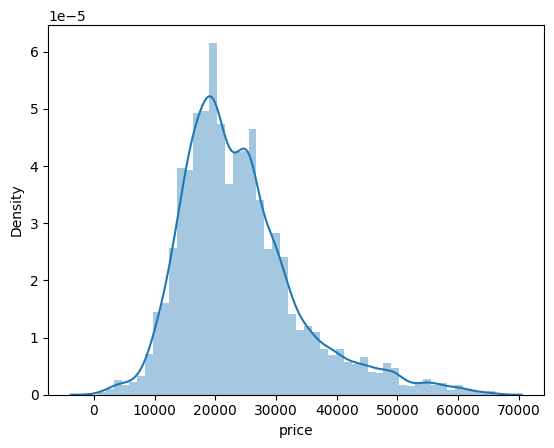

In [ ]:
sbn.distplot(cleaned_df["price"])

In [ ]:
cleaned_df.groupby("year").mean()["price"]

,price
year,
1970,24999.000000
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385


1970 deki ortalama hala çok fazla, bunu da veriden çıkarabiliriz

In [ ]:
cleaned_df[cleaned_df.year != 1970].groupby("year").mean()["price"]

,price
year,
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385
2005,4426.111111


In [ ]:
dataFrame = cleaned_df

In [ ]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [ ]:
dataFrame.groupby("year").mean()["price"]

,price
year,
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385
2005,4426.111111


In [ ]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [ ]:
y = dataFrame["price"].values
X = dataFrame.drop("price", axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 674622528.0000 - val_loss: 688088448.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 675058176.0000 - val_loss: 688018304.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 666946944.0000 - val_loss: 687792128.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 673874304.0000 - val_loss: 687097664.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 679946944.0000 - val_loss: 685286784.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 670006720.0000 - val_loss: 681168768.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 658797120.0000 - val_loss: 672538112.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646961664.0000 - val_loss: 656355136.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 631076544.0000 - val_loss: 628787648.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 617776384.0000 - val_loss: 5860

<Axes: >

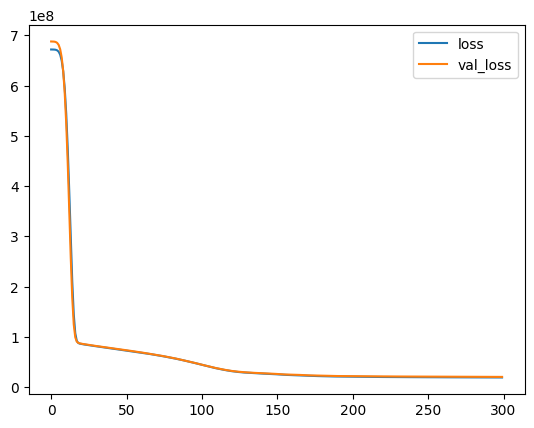

In [ ]:
kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi.plot()

In [ ]:
tahminDizisi = model.predict(X_test)
tahminDizisi

122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[26352.742],
       [23542.744],
       [25341.488],
       ...,
       [23065.277],
       [20139.812],
       [26298.121]], dtype=float32)

In [ ]:
mean_absolute_error(y_test, tahminDizisi)

3224.06201171875

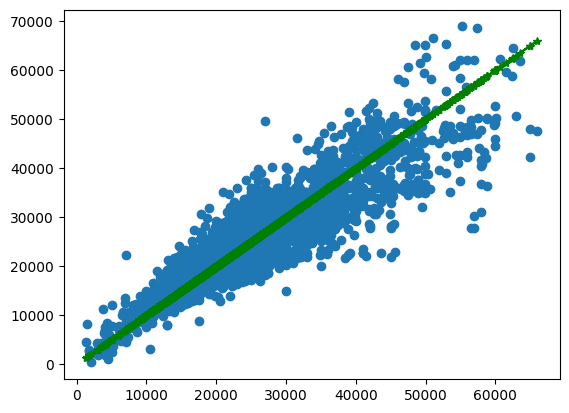

In [ ]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g-*")

In [ ]:
dataFrame.iloc[2]

,3191
year,2020.0
price,65980.0
mileage,3999.0
tax,145.0
mpg,28.0
engineSize,4.0


In [ ]:
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[2]

In [ ]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [ ]:
model.predict(yeniArabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[62937.746]], dtype=float32)